In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
from tqdm import tqdm
import numpy as np

from pydeseq2.preprocessing import deseq2_norm

In [2]:
files = glob("../data/raw/expression/GSE184264_RAW/*.txt.gz")
dataframe = []

mapper = {
          "GRANULOCYTES": "granulocytes",
          "WB": "whole_blood",
          "NK": "NK",
          "CD8N": "naive_CD8",
          "CD4N": "naive_CD4",
          "BN": "naive_B",
          "MONOCYTES": "monocytes",
          "PB": "peripheral_blood",
          "PBMC": "PBMC"
         }

for file in tqdm(files):
    frame = pd.read_table(file, index_col=0)
    
    sample = frame.columns[0]
    sample = sample.replace("_COUNT", "")
    
    stype, donor = sample.split('_')
    new_name = "_".join([mapper[stype], donor.upper()])
    
    frame.columns = [new_name]
    dataframe.append(frame)
    
dataframe = pd.concat(dataframe, axis=1)

to_drop = dataframe.median(axis=1)
to_drop = to_drop[to_drop < 1].index

dataframe = dataframe.drop(to_drop)
dataframe

100%|████████████████████████████████████████████████████████████████████████████████| 193/193 [00:09<00:00, 21.07it/s]


,naive_B_GT001,naive_B_GT002,naive_B_GT003,naive_B_GT004,naive_B_GT005,naive_B_GT007,naive_B_GT011,naive_B_GT013,naive_B_GT014,naive_B_GT015,...,whole_blood_GT025,whole_blood_GT026,whole_blood_GT027,whole_blood_GT029,whole_blood_GT030,whole_blood_GT032,whole_blood_GT033,whole_blood_GT035,whole_blood_GT042,whole_blood_GT045
Tracking_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,2,5,3,2,6,0,1,0,1,13,...,23,5,43,15,75,91,44,42,87,89
ENSG00000000419,753,620,628,601,683,1408,748,802,848,843,...,230,315,267,304,453,484,303,258,211,302
ENSG00000000457,1107,1227,1667,1390,1056,1384,1556,1007,1524,971,...,2021,2540,3288,2730,3685,2278,2349,2345,2044,587
ENSG00000000460,1118,994,1736,1290,1353,1150,1947,1042,1857,986,...,1580,2142,2523,2116,3091,2113,1878,1822,1880,1324
ENSG00000000938,10863,4471,4787,6559,2148,1329,6287,3043,2529,3151,...,27574,13921,8835,20390,15784,7485,6346,10229,14816,5558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273486,39,80,99,67,104,210,67,73,173,76,...,96,117,248,131,183,197,187,105,127,144
ENSG00000273487,0,0,4,0,3,17,2,1,1,5,...,4,0,15,0,8,11,38,9,0,0
ENSG00000273488,23,47,82,22,117,158,71,118,128,75,...,96,86,257,97,181,130,185,144,114,83


In [3]:
normalized_counts, _ = deseq2_norm(dataframe.T)
normalized_counts = normalized_counts.T
normalized_counts

,naive_B_GT001,naive_B_GT002,naive_B_GT003,naive_B_GT004,naive_B_GT005,naive_B_GT007,naive_B_GT011,naive_B_GT013,naive_B_GT014,naive_B_GT015,...,whole_blood_GT025,whole_blood_GT026,whole_blood_GT027,whole_blood_GT029,whole_blood_GT030,whole_blood_GT032,whole_blood_GT033,whole_blood_GT035,whole_blood_GT042,whole_blood_GT045
Tracking_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,1.458599,4.920515,2.802568,1.714649,5.842021,0.000000,0.748661,0.000000,1.003586,13.737837,...,24.612330,5.596125,44.818820,13.643782,49.584716,116.568040,53.951374,44.111593,115.690030,279.081978
ENSG00000000419,549.162573,610.143811,586.670957,515.251941,665.016706,1799.600906,559.998054,821.301023,851.041276,890.845901,...,246.123305,352.555889,278.293600,276.513987,299.491683,619.988259,371.528780,270.971215,280.581567,946.997275
ENSG00000000457,807.334620,1207.494284,1557.293767,1191.680862,1028.195668,1768.925890,1164.915739,1031.234577,1529.465690,1026.110759,...,2162.674777,2842.831614,3427.076245,2483.168369,2436.262369,2918.043912,2880.267668,2462.897287,2718.050820,1840.686755
ENSG00000000460,815.356915,978.198304,1621.752837,1105.948426,1317.375700,1469.844490,1457.641994,1067.076891,1863.659964,1041.962110,...,1690.760093,2397.380046,2629.718177,1924.682882,2043.551420,2706.684279,2302.742734,1913.602924,2499.968465,4151.736396
ENSG00000000938,7922.381185,4399.924161,4471.964764,5623.190483,2091.443462,1698.628980,4706.828567,3116.233185,2538.070032,3329.840373,...,29506.973927,15580.731851,9208.703961,18546.448001,10435.268720,9588.041564,7781.259525,10743.273496,19701.879137,17428.512755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000273486,28.442683,78.728234,92.484753,57.440732,101.261695,268.406385,50.160254,74.756826,173.620449,80.313509,...,102.729727,130.949330,258.489936,119.155698,120.986707,252.350593,229.293339,110.278983,168.880848,451.548369
ENSG00000273487,0.000000,0.000000,3.736758,0.000000,2.921010,21.728136,1.497321,1.024066,1.003586,5.283784,...,4.280405,0.000000,15.634472,0.000000,5.289036,14.090642,46.594368,9.452484,0.000000,0.000000
ENSG00000273488,16.773890,46.252837,76.603533,18.861136,113.919406,201.943852,53.154896,120.839801,128.459061,79.256753,...,102.729727,96.253354,267.870619,88.229792,119.664447,166.525772,226.841004,151.239748,151.593832,260.267463


In [4]:
normalized_counts = normalized_counts.apply(lambda x: np.log2(x + 1))

<Axes: ylabel='Density'>

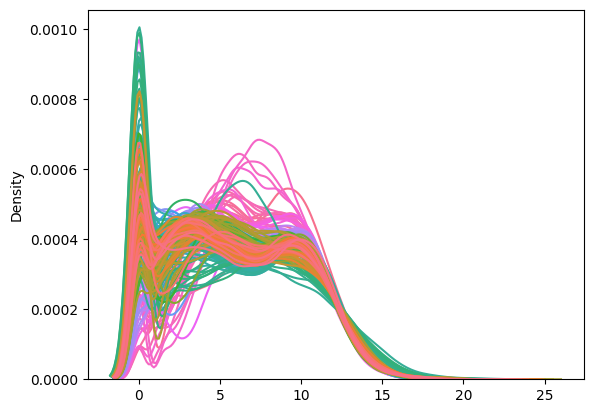

In [5]:
sns.kdeplot(normalized_counts, legend=False)

In [6]:
exp_ss = pd.read_csv("../data/expression_sample_sheet.csv", index_col=0)
common = set(exp_ss["sample"]).intersection(set(normalized_counts.columns))
common = list(common)
len(common)

168

In [8]:
normalized_counts[common].to_parquet("../data/processed/expression.parquet")